<center>
<h1> MV LAB ASSIGNMENT 1C </h1>

Anirudh T, 21BAI1163
</center>

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# TASK-1: Intro to Histogram Equalization

Objective: Understand the basics of histogram equalization and its impact on image contrast.
1. Load and Display an Image:

* Load a grayscale image and display it.
* Plot the histogram of the original image to show the distribution of pixel 
intensities.

2. Calculate and Plot Histogram:

* Calculate the histogram of the image manually.
* Plot the histogram to visualize the pixel intensity distribution.

3. Calculate Cumulative Distribution Function (CDF):

* Compute the CDF from the histogram.
* Normalize the CDF to the range [0, 255].

4. Apply Histogram Equalization:

* Map the original pixel values to equalized pixel values using the CDF.
* Display the equalized image and plot its histogram.

5. Compare Results:

* Compare the original and equalized images.
* Discuss the differences in visual quality and histogram distributions.

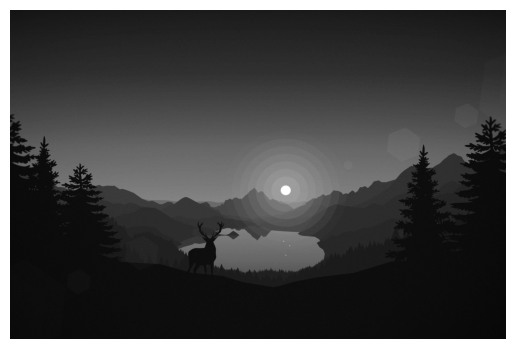

In [18]:
#display the image

img=cv.imread(r"C:\Trial\MV\images\wp1.jpg")
img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

automatic histogram calculation + equalization

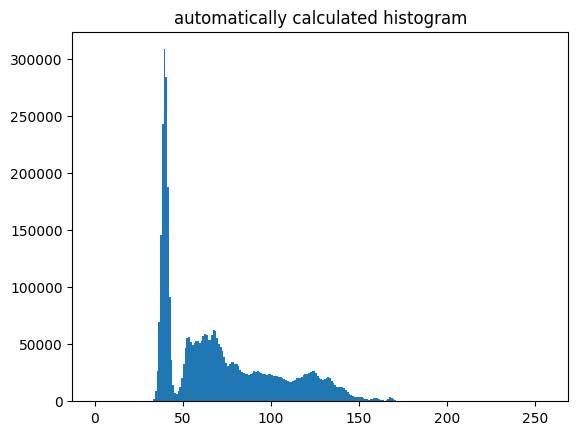

In [23]:
#automatic histogram calculation

plt.hist(img.ravel(), 256, [0,256])
plt.title('automatically calculated histogram')
plt.show()

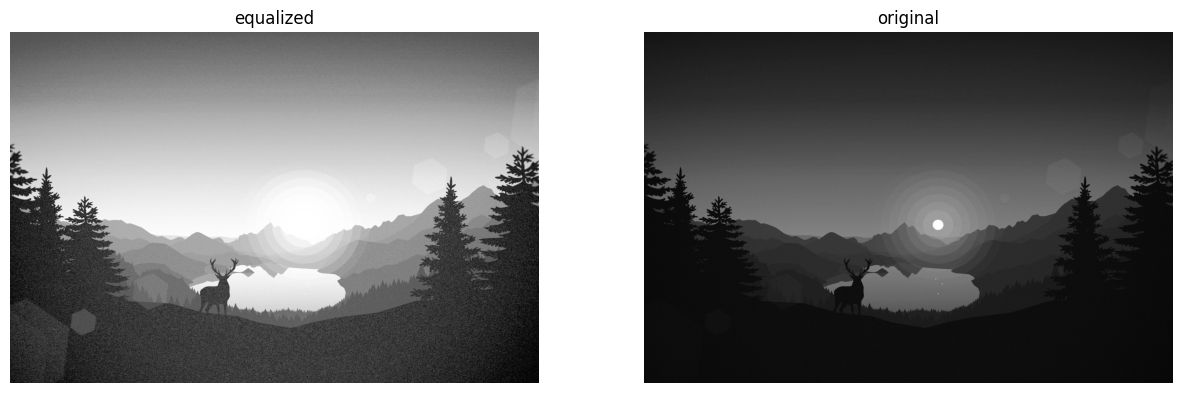

In [24]:
#automatic histogram equalization

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("equalized")
plt.subplots_adjust(wspace=0.2)
plt.imshow(cv.equalizeHist(img), cmap = 'gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("original")
plt.imshow(img, cmap = 'gray')

manual histogram + cdf calculation

In [27]:
#function to manually calculate histogram

def manual_hist(img, bins):
    h = np.zeros(bins)
    for p in img:
        h[p]+=1
    return h

<BarContainer object of 256 artists>

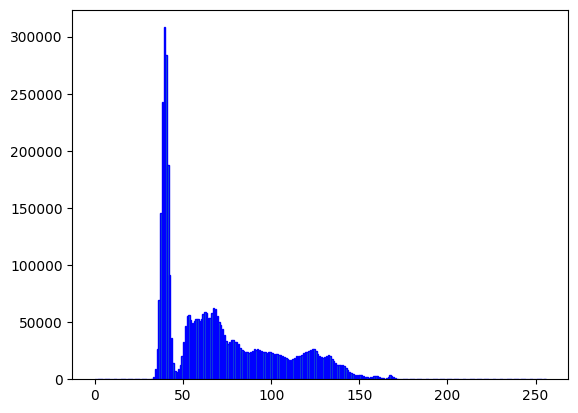

In [28]:
flat = np.asarray(img).flatten()
histogram = manual_hist(flat, 256)
arr = np.arange(256)
plt.bar(arr, histogram, align='edge', edgecolor='blue')

In [29]:
#function to manually calculate cdf

def cumsum(h):
  cdf = np.zeros(len(h))
  cdf[0] = h[0]
  for i in range(1, len(h)):
    cdf[i] = cdf[i-1] + h[i]
  return cdf


In [30]:
#function to normalize the cdf
def normalized_cdf(cdf):
  num = cdf - np.min(cdf)
  den = np.max(cdf) - np.min(cdf)
  return (num/den)*255

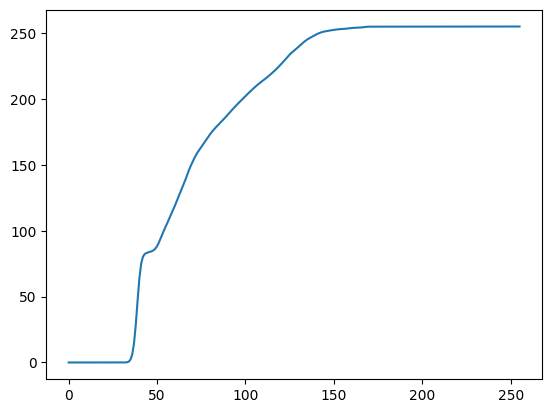

In [31]:
#plotting the normalized cdf values

cdf = cumsum(histogram)
cdf_norm = normalized_cdf(cdf)
plt.plot(cdf_norm)

manual histogram equalization

In [32]:
#setting the new values for intensity after equalization

cdf_norm = cdf_norm.astype(np.uint8)
img_new = cdf_norm[flat]
img_new = np.reshape(img_new, img.shape)

In [33]:
#histogram for new image

histogram_new = manual_hist(img_new.flatten(), 256)

<BarContainer object of 256 artists>

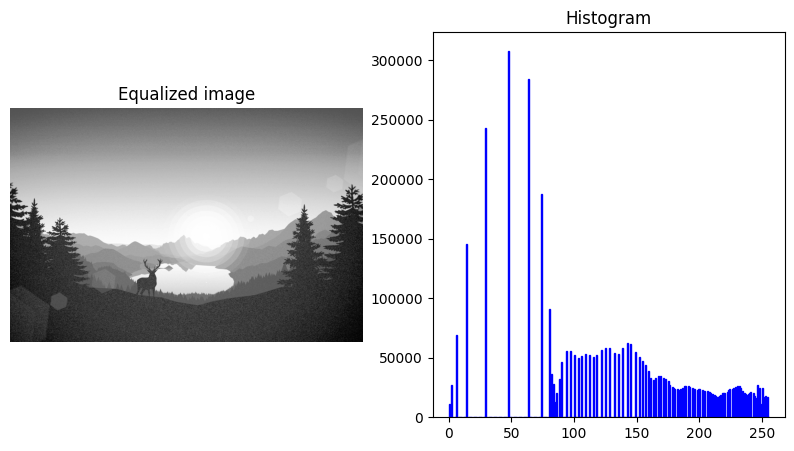

In [35]:
#plotting the equalized image and equalized histogram

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Equalized image")
plt.axis('off')
plt.imshow(img_new, cmap='gray')
plt.subplot(1,2,2)
plt.title("Histogram")
plt.bar(arr, histogram_new, align='edge', edgecolor='blue')

OBSERVATIONS

1. Histogram equalization significantly enhances image contrast, making previously hidden details more visible.
2. The equalized image's histogram is more uniformly distributed compared to the original, indicating improved intensity distribution.


# TASK-2: Comparing Histogram Equalization Techniques


Objective: Compare standard histogram equalization with adaptive histogram equalization.

1. Implement Adaptive Histogram Equalization (AHE):

- Divide the image into smaller regions (tiles).

- Apply histogram equalization to each tile separately.

- Combine the tiles to form the final image.

2. Implement Contrast Limited Adaptive Histogram Equalization (CLAHE):

- Enhance the AHE implementation by limiting the contrast.

- Apply CLAHE to the image and display the result.

3. Compare Results:

- Display the original image, standard histogram equalized image, AHE image, and CLAHE image side by side.

- Discuss the differences in visual quality and histogram distributions.


In [36]:
#standard Histogram Equalization

img_eq = cv.equalizeHist(img)

In [37]:
# Adaptive Histogram Equalization

def adaptive_histogram_equalization(image, tile_size=8):
    h, w = image.shape
    ahe_image = np.zeros_like(image)
    for i in range(0, h, tile_size):
        for j in range(0, w, tile_size):
            tile = image[i:i + tile_size, j:j + tile_size]
            ahe_tile = cv.equalizeHist(tile)
            ahe_image[i:i + tile_size, j:j + tile_size] = ahe_tile
    return ahe_image

ahe_image = adaptive_histogram_equalization(img)

In [38]:
# Contrast Limited Adaptive Histogram Equalization
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(img)

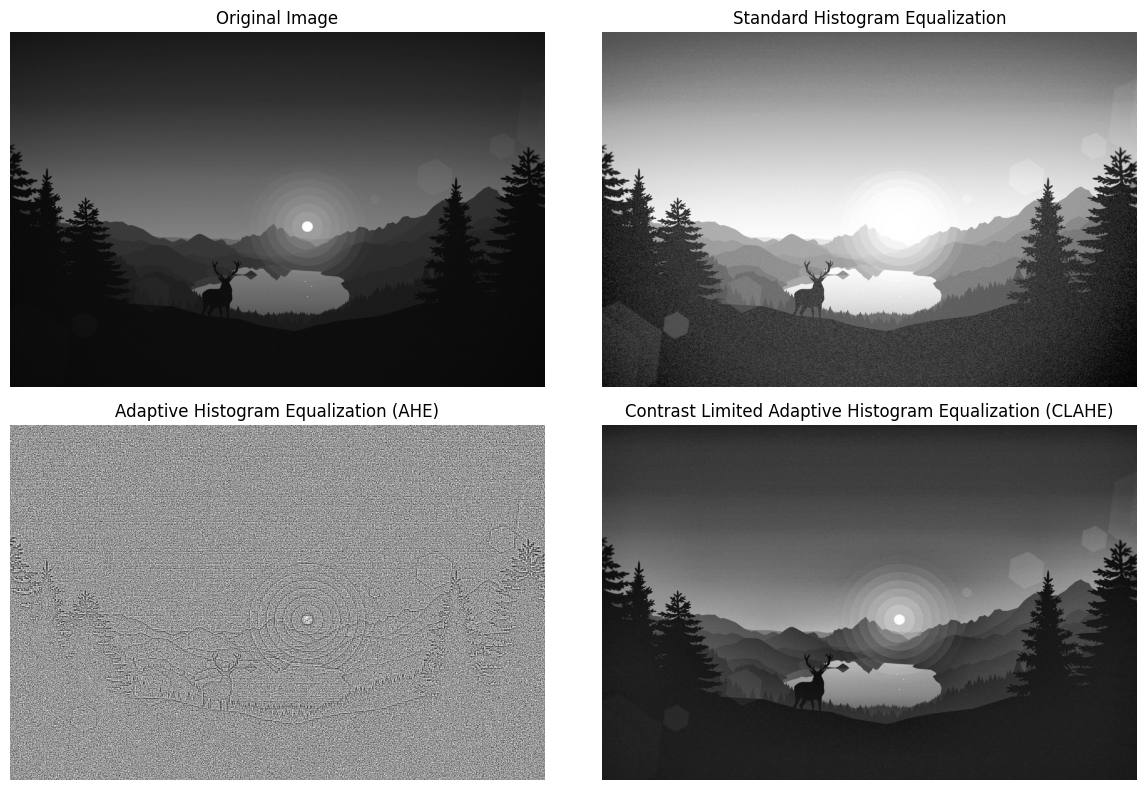

In [39]:
# Display the images side by side
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Standard Histogram Equalization')
plt.imshow(img_eq, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Adaptive Histogram Equalization (AHE)')
plt.imshow(ahe_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Contrast Limited Adaptive Histogram Equalization (CLAHE)')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

OBSERVATIONS

1. Adaptive Histogram Equalization (AHE) provides better local contrast in smaller regions compared to standard histogram equalization.
2. Contrast Limited Adaptive Histogram Equalization (CLAHE) effectively prevents over-amplification of noise, leading to a more balanced enhancement.


# TASK-3: Implementing Histogram Equalization on Color Images

Objective: Apply histogram equalization to color images.

1. Separate Color Channels:

- Split the color image into its Red, Green, and Blue (RGB) channels.

2. Apply Histogram Equalization to Each Channel:

- Perform histogram equalization on each color channel separately.

3. Reconstruct the Color Image:

- Combine the equalized color channels to form the final image.

4. Compare Results:

- Display the original and equalized color images.

- Discuss the visual differences and effects of equalization on color images.

In [44]:
#splitting the image into different color channels

img=cv.imread(r"C:\Trial\MV\images\wp1.jpg")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
b,g,r = cv.split(img)

In [45]:
#equalizing each channel

r_eq=cv.equalizeHist(r)
g_eq=cv.equalizeHist(g)
b_eq=cv.equalizeHist(b)

#merging the equalized channels

eq_img=cv.merge([r_eq,g_eq,b_eq])

(-0.5, 2559.5, 1699.5, -0.5)

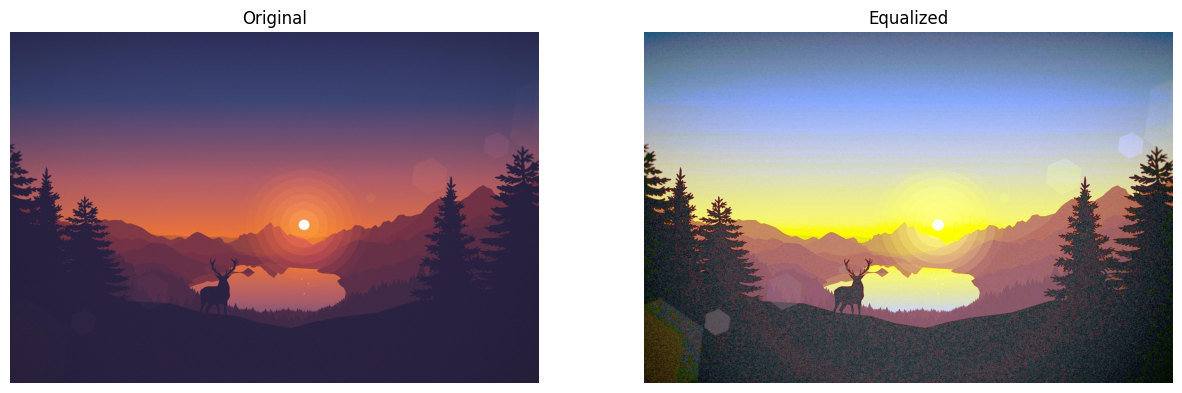

In [48]:
#plotting the equalized image

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Equalized")
plt.imshow(cv.cvtColor(eq_img,cv.COLOR_BGR2RGB))
plt.axis('off')

OBSERVATIONS

1. Applying histogram equalization separately to each RGB channel can sometimes lead to color distortion.
2. The overall contrast of the color image improves, but the balance between color channels needs careful handling to avoid unnatural hues.


# TASK-4: Histogram Equalization in Different Applications

Objective: Explore the use of histogram equalization in various applications.

1. Medical Imaging:

- Apply histogram equalization to medical images (e.g., X-rays, MRIs).

- Discuss how equalization can enhance the visibility of important features.

2. Satellite Imagery:

- Apply histogram equalization to satellite images.

- Analyze how equalization improves the contrast and details in the images.

3. Document Scanning:

- Apply histogram equalization to scanned documents.

- Evaluate how equalization enhances text readability and clarity.

4. Night Vision:

- Apply histogram equalization to night vision images.

- Discuss how equalization improves the visibility of objects in low-light conditions.

In [51]:
#medical imaging application
xray=cv.imread(r"C:\Trial\MV\images\xray.jpg")
xray=cv.cvtColor(xray, cv.COLOR_BGR2GRAY)

#satellite imaging application
satt=cv.imread(r"C:\Trial\MV\images\satellite.jpg")
satt=cv.cvtColor(satt, cv.COLOR_BGR2GRAY)

#document scanning application
doc=cv.imread(r"C:\Trial\MV\images\docscan.jpg")
doc=cv.cvtColor(doc, cv.COLOR_BGR2GRAY)

#night vision application
vis=cv.imread(r"C:\Trial\MV\images\nightvis.jpg")
vis=cv.cvtColor(vis, cv.COLOR_BGR2GRAY)

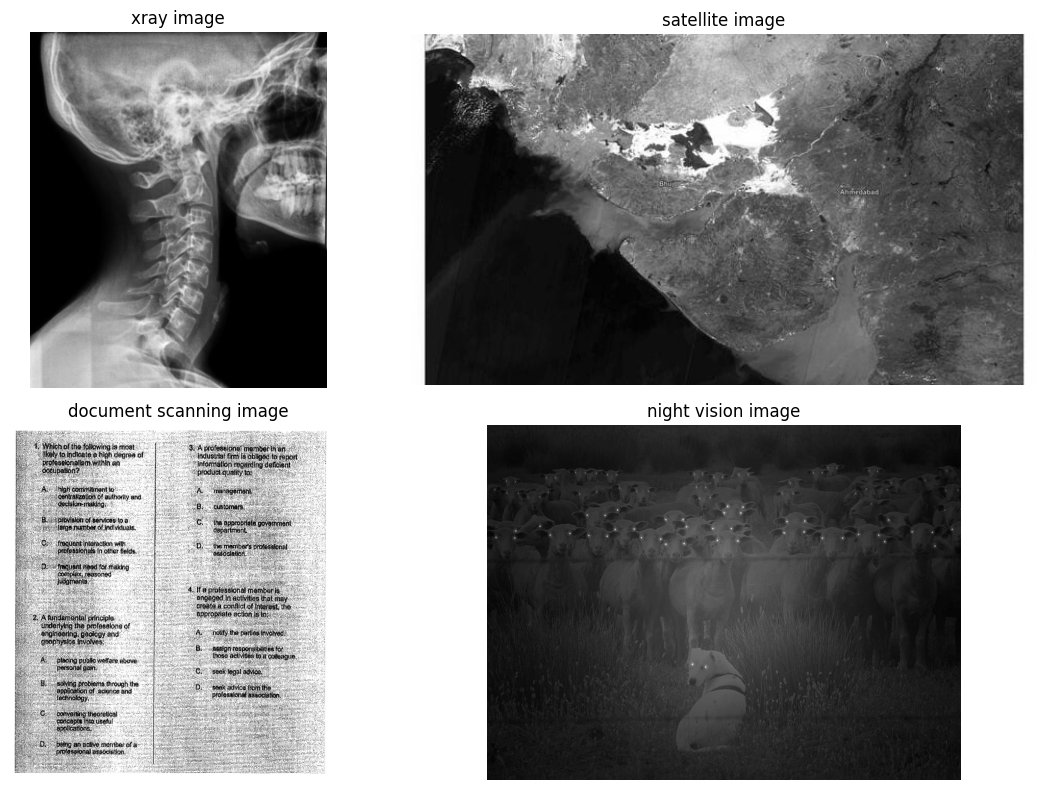

In [52]:
# Display the images

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('xray image')
plt.imshow(xray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('satellite image')
plt.imshow(satt, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('document scanning image')
plt.imshow(doc, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('night vision image')
plt.imshow(vis, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [53]:
# equalize the images

xray_eq=cv.equalizeHist(xray)
satt_eq=cv.equalizeHist(satt)
doc_eq=cv.equalizeHist(doc)
vis_eq=cv.equalizeHist(vis)

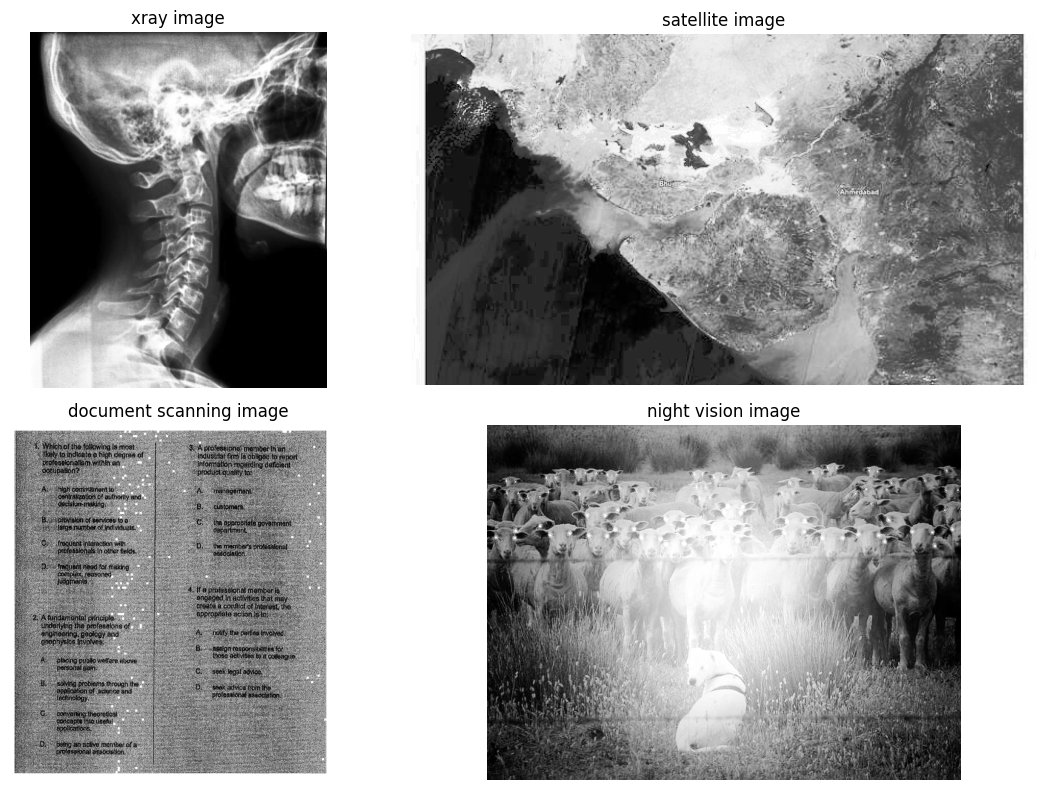

In [54]:
# Display the equalized images

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('xray image')
plt.imshow(xray_eq, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('satellite image')
plt.imshow(satt_eq, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('document scanning image')
plt.imshow(doc_eq, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('night vision image')
plt.imshow(vis_eq, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

OBSERVATIONS

1. In medical imaging, histogram equalization can reveal subtle details in X-rays and MRIs that are otherwise difficult to discern.
2. For satellite imagery, histogram equalization enhances terrain and structural features, improving image interpretability.
3. In document scanning, histogram equalization improves the legibility of faded or poorly lit text.
4. In night vision, histogram equalization enhances visibility by increasing the contrast in low-light environments.


# TASK-5: Histogram Equalization for Low Contrast Images

Objective: Improve the visibility of features in images with low contrast.

1. Select a Low Contrast Image:

- Choose an image with low contrast or uniform intensity distribution.

2. Apply Histogram Equalization:

- Perform histogram equalization on the low contrast image.

- Display and compare the results to the original image.

3. Analyze Results:

- Evaluate the improvement in contrast and feature visibility.

- Discuss how histogram equalization addresses low contrast issues.


In [77]:
img=cv.imread(r"C:\Trial\MV\images\low_contrast.png")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [78]:
img=cv.cvtColor(img, cv.COLOR_BGR2GRAY) #hist_eq() can only be done on 1 channel, so convert to grayscale
img_eq=cv.equalizeHist(img)
img_eq=cv.cvtColor(img_eq, cv.COLOR_GRAY2RGB) #convert back to rgb image

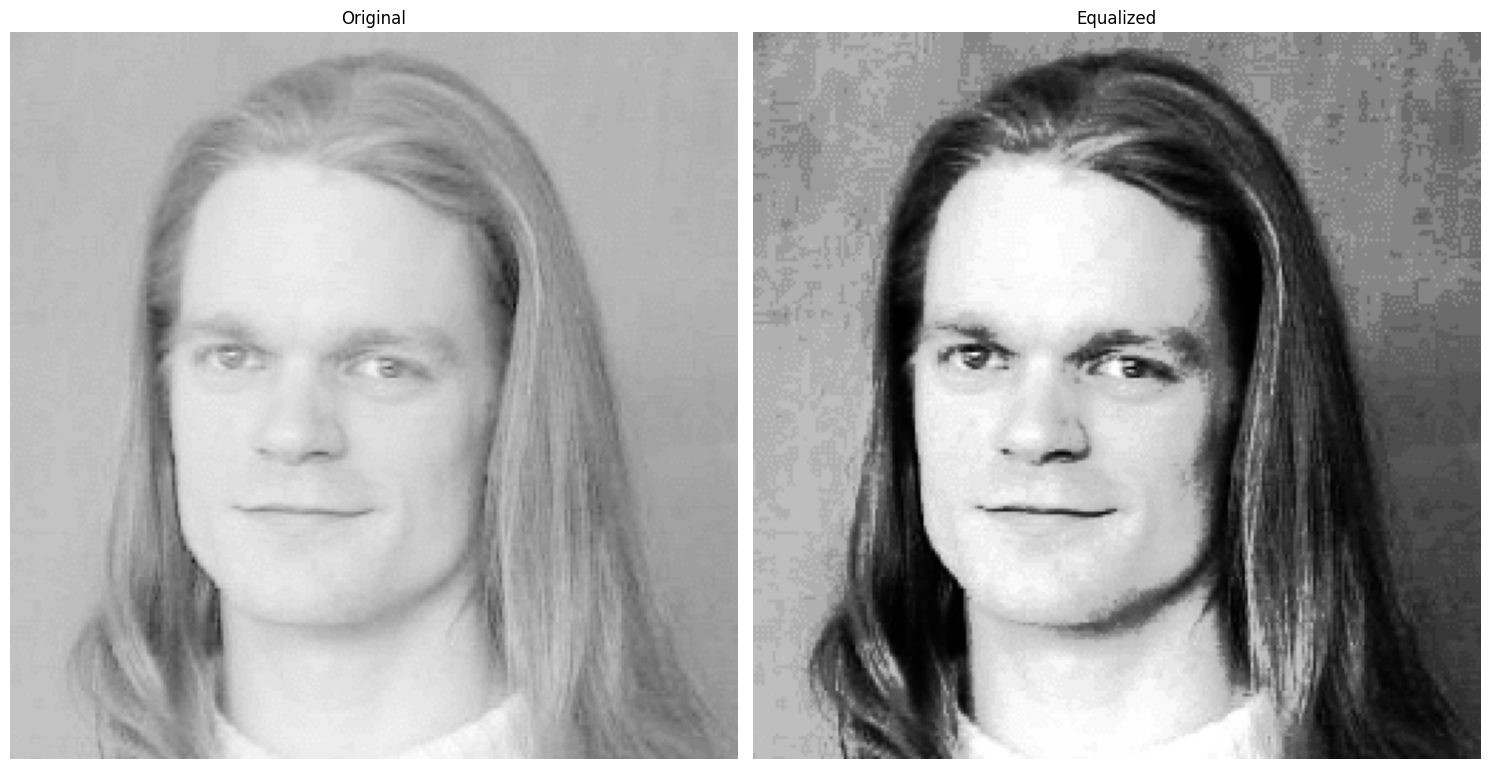

In [79]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Equalized")
plt.imshow(img_eq,cmap='gray')
plt.axis('off')
plt.tight_layout()

OBSERVATIONS

1. Histogram equalization markedly improves contrast in low contrast images, making the features more distinguishable.
2. While equalization enhances overall visibility, it can also introduce some noise in areas of uniform intensity.


# TASK-6: : Multi-Scale Histogram Equalization

Objective: Explore the effects of applying histogram equalization at different scales.

1. Image Rescaling:

- Resize the image to different scales (e.g., 50%, 100%, 200%).

2. Apply Histogram Equalization:

- Perform histogram equalization on the resized images.

3. Compare Results:

- Compare the equalized images at different scales.

- Discuss how the scale affects the equalization results and image details.

In [80]:
img=cv.imread(r"C:\Trial\MV\images\wp1.jpg")
img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#defining scales
scales = [0.5, 1.0, 2.0]
scaled_imgs = []

In [81]:
#applying Histogram Equalization on the images

for scale in scales:
    w = int(img.shape[1] * scale)
    h = int(img.shape[0] * scale)
    dim = (w, h)
    resized_img = cv.resize(img, dim)
    img_eq = cv.equalizeHist(resized_img)
    scaled_imgs.append((resized_img, img_eq))

(-0.5, 5119.5, 3399.5, -0.5)

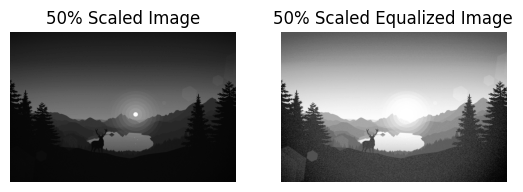

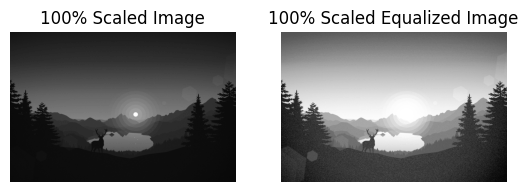

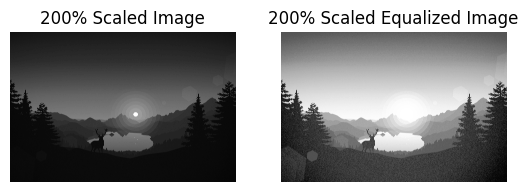

In [82]:
#plotting results

plt.figure()
plt.subplot(1,2,1)
plt.title("50% Scaled Image")
plt.imshow(scaled_imgs[0][0], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("50% Scaled Equalized Image")
plt.imshow(scaled_imgs[0][1], cmap='gray')
plt.axis('off')

plt.figure()
plt.subplot(1,2,1)
plt.title("100% Scaled Image")
plt.imshow(scaled_imgs[1][0], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("100% Scaled Equalized Image")
plt.imshow(scaled_imgs[1][1], cmap='gray')
plt.axis('off')

plt.figure()
plt.subplot(1,2,1)
plt.title("200% Scaled Image")
plt.imshow(scaled_imgs[2][0], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("200% Scaled Equalized Image")
plt.imshow(scaled_imgs[2][1], cmap='gray')
plt.axis('off')

OBSERVATIONS

1. Applying histogram equalization to different image scales shows that smaller images tend to have less detailed enhancement.
2. Larger scales often result in more pronounced contrast improvements, but fine details may sometimes be oversaturated.


# TASK-7: Histogram Equalization for Image Enhancement

Objective: Use histogram equalization to enhance images for better visual analysis.

1. Select Images:

- Choose images with varying levels of detail and contrast.

2. Apply Histogram Equalization:

- Perform histogram equalization on the selected images.

3. Evaluate Enhancement:

- Compare the equalized images to the originals in terms of detail enhancement and clarity.

- Discuss how histogram equalization improves visual analysis in different scenarios.

In [131]:
#taking images at varying levels of contrast and detail

low_con=cv.imread(r"C:\Trial\MV\images\low_contrast.png")
high_con=cv.imread(r"C:\Trial\MV\images\high_contrast.jpg")
low_det=cv.imread(r"C:\Trial\MV\images\low_detail.jpg")
high_det=cv.imread(r"C:\Trial\MV\images\wp1.jpg")

In [132]:
#converting images to grayscale

low_con=cv.cvtColor(low_con,cv.COLOR_BGR2GRAY)
high_con=cv.cvtColor(high_con,cv.COLOR_BGR2GRAY)
low_det=cv.cvtColor(low_det,cv.COLOR_BGR2GRAY)
high_det=cv.cvtColor(high_det,cv.COLOR_BGR2GRAY)

In [133]:
#equalizing the images

low_con_eq = cv.equalizeHist(low_con)
high_con_eq = cv.equalizeHist(high_con)
low_det_eq = cv.equalizeHist(low_det)
high_det_eq = cv.equalizeHist(high_det)

(-0.5, 2559.5, 1699.5, -0.5)

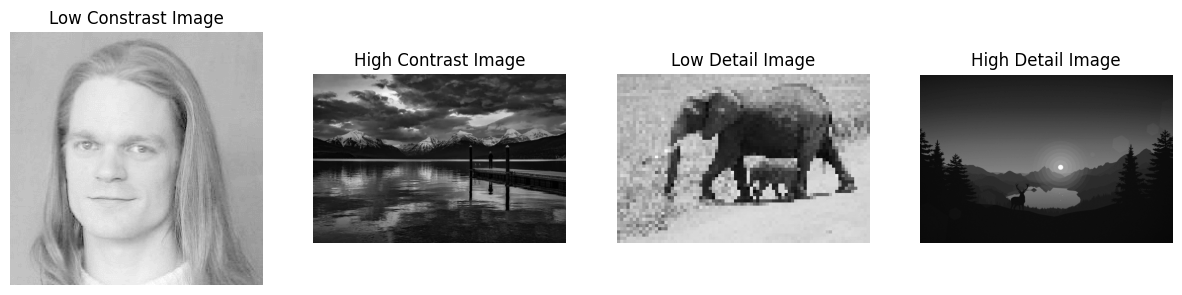

In [134]:
# original images

plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
plt.title("Low Constrast Image")
plt.imshow(low_con,cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.title("High Contrast Image")
plt.imshow(high_con,cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.title("Low Detail Image")
plt.imshow(low_det,cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.title("High Detail Image")
plt.imshow(high_det,cmap='gray')
plt.axis('off')

(-0.5, 2559.5, 1699.5, -0.5)

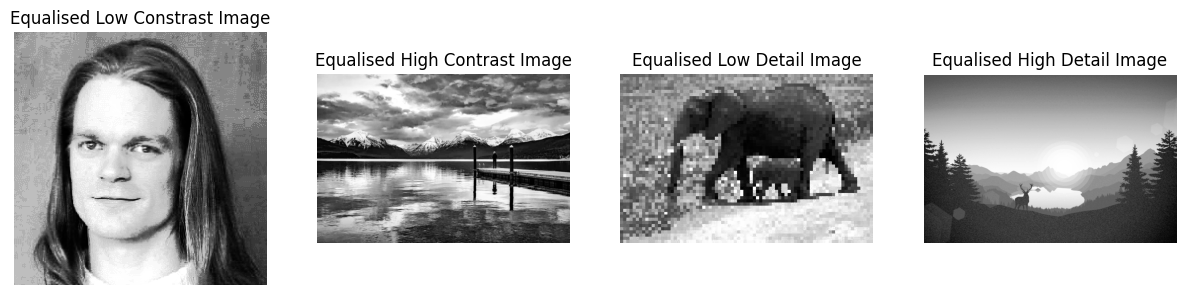

In [136]:
# equalized images

plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
plt.title("Equalised Low Constrast Image")
plt.imshow(low_con_eq,cmap='gray')
plt.axis('off')
plt.subplot(1,4,2)
plt.title("Equalised High Contrast Image")
plt.imshow(high_con_eq,cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.title("Equalised Low Detail Image")
plt.imshow(low_det_eq,cmap='gray')
plt.axis('off')
plt.subplot(1,4,4)
plt.title("Equalised High Detail Image")
plt.imshow(high_det_eq,cmap='gray')
plt.axis('off')

OBSERVATIONS

1. Histogram equalization generally enhances image clarity, making details more apparent, especially in images with low initial contrast.
2. The level of enhancement varies depending on the image content; high-contrast images see less noticeable improvement.


# TASK-8: Histogram Equalization in Image Segmentation

Objective: Assess the impact of histogram equalization on image segmentation performance.

1. Image Segmentation:

- Perform segmentation on an image using thresholding or region-based methods.

2. Apply Histogram Equalization:

- Apply histogram equalization to the original image and perform the same segmentation.

3. Compare Segmentation Results:

- Analyze the differences in segmentation results before and after histogram equalization.

- Discuss the impact of equalization on segmentation accuracy and effectiveness

In [137]:
#convert image to hsv for segmentation

img=cv.imread(r"C:\Trial\MV\images\wp1.jpg")
img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

In [138]:
#segmenting purples from the image

lower = np.array([125, 50, 50]) 
higher = np.array([155, 255, 255])
mask = cv.inRange(img_hsv, lower, higher)
res = cv.bitwise_and(img, img, mask=mask)

In [139]:
#equalizing the original image (using manual method, allowing for color image equalization without channel splitting)

f = np.asarray(img)
h = manual_hist(f.flatten(), 256)
c = cumsum(h)
norm = normalized_cdf(c)
norm = norm.astype(np.uint8)
new = norm[img.flatten()]
new = np.reshape(new, img.shape)

In [140]:
#applying segmentation to the equalized image

res_new = cv.bitwise_and(new, new, mask=mask)

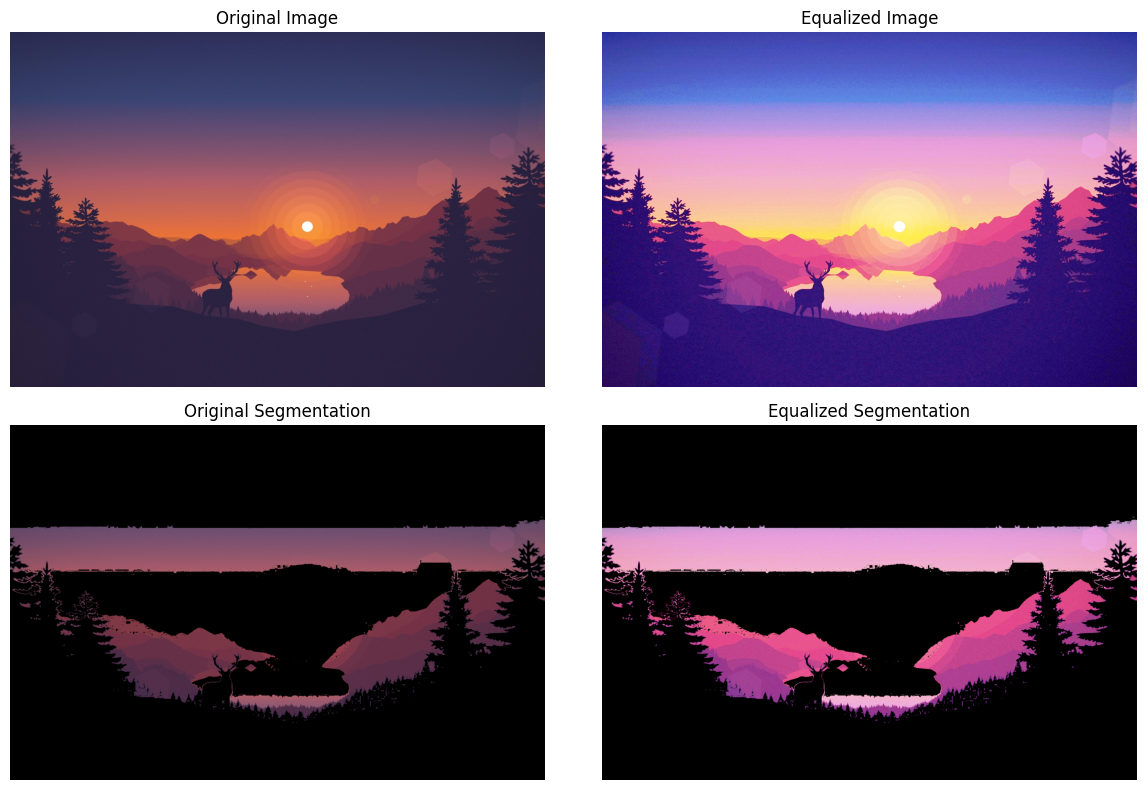

In [141]:
# plotting, comparing results

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Equalized Image')
plt.imshow(cv.cvtColor(new,cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original Segmentation')
plt.imshow(cv.cvtColor(res,cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Equalized Segmentation')
plt.imshow(cv.cvtColor(res_new,cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

OBSERVATIONS

1. Histogram equalization before segmentation often leads to more distinct boundaries, improving segmentation accuracy.
2. The improvement in segmentation quality is particularly noticeable in images where the original contrast is low, enhancing the separation of regions.
